In [ ]:
import h5py
from pathlib import Path
import torch
import matplotlib.pyplot as plt

file_path = Path("/Users/anthonylee/Downloads/essential_tremor/ET1/Pegboard_off.h5")
file_path = Path(".")

with h5py.File(file_path, "r") as file:
    # print(file.parent, file.file, file.name, file.id, file.attrs, sep="\n\n")
    def print_name(name):
        print(name)
    def print_name_object(name, obj):
        print(name, type(obj), obj)

    # file.visit(print_name)
    file.visititems(print_name_object)

    ex_data = torch.tensor(file["LFP"][:])
    ex_data_y = torch.tensor(file["label"][:])


temp = ex_data[0, :10000]
temp_y = ex_data_y[:100000]


output = temp_y.unfold(0, 2048, 1).to(torch.float16).mean(dim=1, keepdim=True)
print(output.shape)



LFP <class 'h5py._hl.dataset.Dataset'> <HDF5 dataset "LFP": shape (4, 1455948), type "<f8">
label <class 'h5py._hl.dataset.Dataset'> <HDF5 dataset "label": shape (1455948,), type "|b1">
torch.Size([97953, 1])


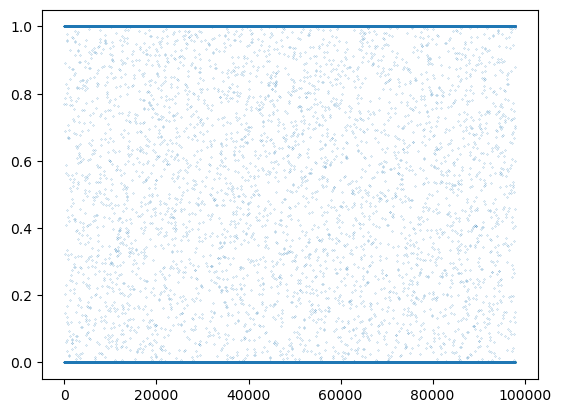

In [14]:
plt.plot(output[torch.randperm(output.shape[0])], ".", markersize=.3)

NameError: name 'ex_data' is not defined